# Irreducible Mass of Black Holes

$f(\chi) = M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^{2}}}{2}}$ with the spin $\chi \in [0,1]$ is the irreducible mass of a black hole.

Suppouse you have repeated measurements of $M$ and $\chi$ and let's assume that
 - the spin is uniformly distributed between $0$ and $1$.
 - the mass $M$ is normally distributed with mean $\mu$ and standard distribution $\sigma$.
 - (masses and spins are uncorrelated)

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks")
from Utilities import plot_settings
from scipy import stats
import scipy

In [49]:
N = int(1e4)

In [50]:
chi = np.random.uniform(0,1,N)[:-1] # Chi values extracted from uniform distribution
mu = 1 # for convenience
sigma = 0.02
M   = np.random.normal(mu,sigma,N) # M values extracted from normal distribution

In [51]:
def f(chi):
    return np.sqrt(0.5 * (1+np.sqrt(1-chi**2)))

def Mirr(M,chi):
    try:
        M.size == chi.size
    except:
        raise IndexError("Sizes of masses and spins should be equal!")
    return M*f(chi)

9. **Using the expressions from point 7 and 8, plot those pdfs check that they agree with your KDE reconstructions.**

(0.0, 28.368901135766567)

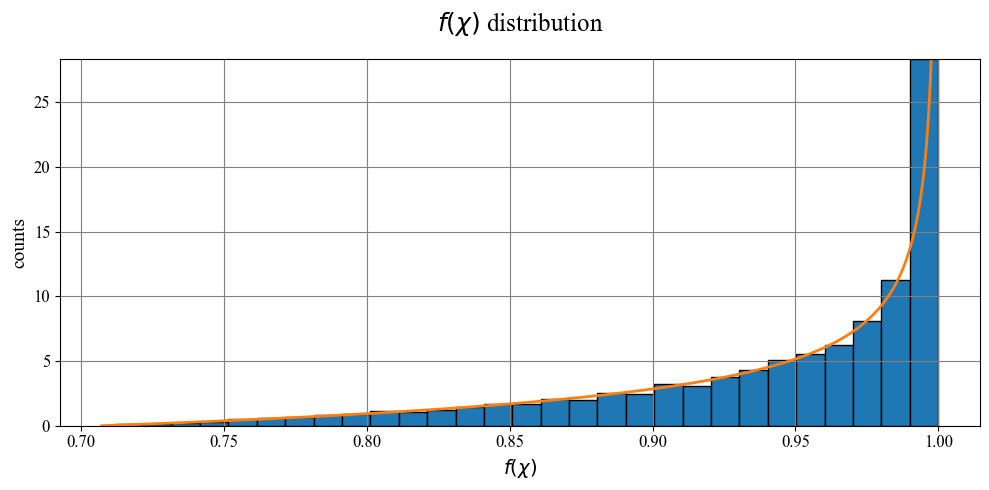

In [52]:
x_plot = np.linspace(1/2**0.5,1,N)[:-1]
t,_,_=plt.hist(f(chi), bins='scott',density=True, histtype='barstacked', edgecolor='black')

theoretical = 2*(2*x_plot**2-1)/(1 - x_plot**2)**0.5
plt.plot(x_plot, theoretical,lw=2, label='Theoretical pdf')
plt.title(r'$f(\chi)$ distribution')
plt.xlabel(r'$f(\chi)$')
plt.ylabel(r'counts')
plt.ylim(0,max(t))

(0.0, 19.912005602370826)

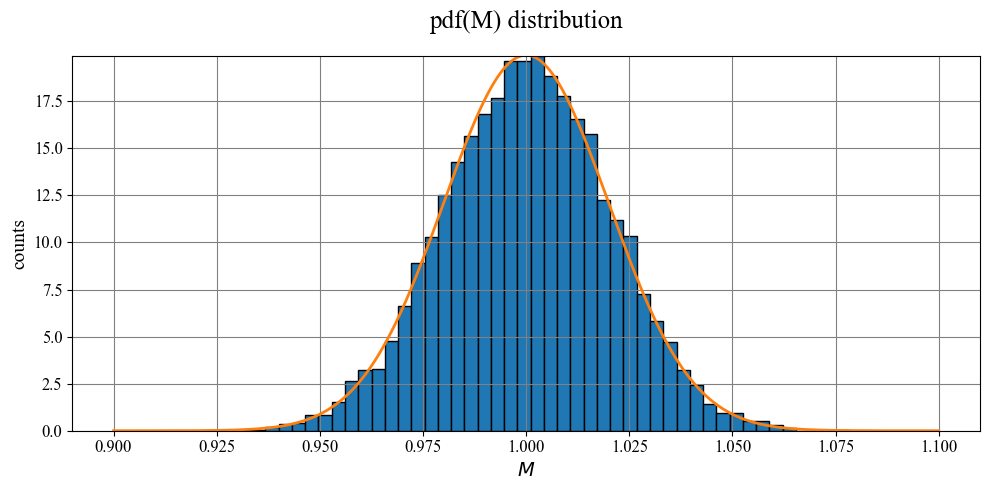

In [53]:
x_plot = np.linspace(1-5*sigma,1+5*sigma,N)
t,_,_=plt.hist(M, bins='scott',density=True, histtype='barstacked', edgecolor='black')
m = scipy.stats.norm.pdf(x_plot,mu,sigma)
plt.plot(x_plot, m)
plt.title(r'pdf(M) distribution')
plt.xlabel(r'$M$')
plt.ylabel(r'counts')
plt.ylim(0,max(t))

1. **Start with a value of $\sigma = 0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a  dimenion of mass by $\mu$. Just set $\mu = 1$ and remember that all masses are measured in units of $\mu$.**

In [54]:
chi = np.random.uniform(0,1,N) # Chi values extracted from uniform distribution
mu = 1 # for convenience
sigma = 0.02
M   = np.random.normal(mu,sigma,N) # M values extracted from normal distribution
data = Mirr(M,chi)

2. **Plot the resulting pdf of $M_{irr}$. First try an histogram with one of the rules of thumb seen during lecture**

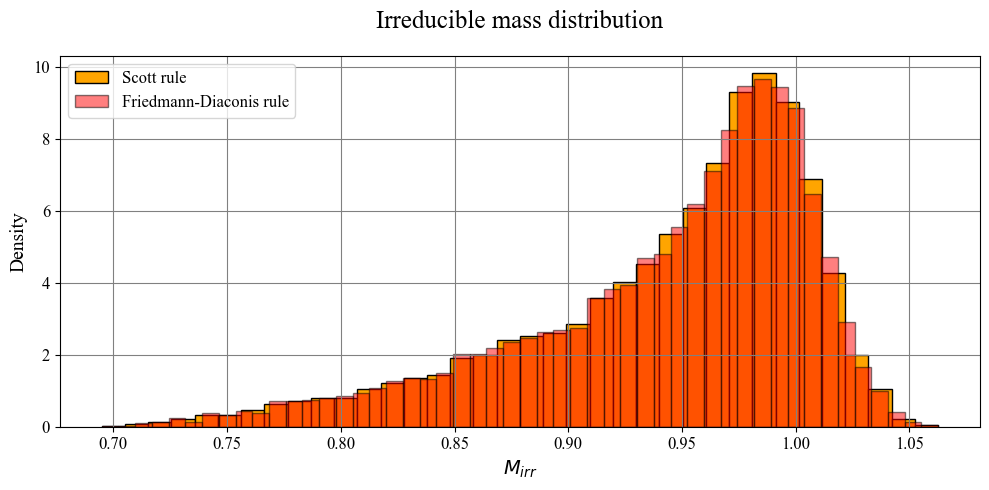

In [55]:
scott_c, scott_b, _ = plt.hist(data, density=True, bins='scott', histtype='barstacked', color='orange', edgecolor='black', label='Scott rule')
fd_c, fd_b, _ = plt.hist(data, bins='fd', density=True, histtype='barstacked', color='red', edgecolor='black', alpha=0.5, label='Friedmann-Diaconis rule')
plt.title('Irreducible mass distribution')
plt.ylabel('Density')
plt.xlabel(r'$M_{irr}$')
plt.legend()

3. **Using the same samples as in the previous point, plot the distribution of $M_{irr}$ using KDE**

In [56]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [57]:
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

Perform Cross-Validation to know which kernel and bandwidth combination is the best one to use

In [69]:
custom_cv = KFold(n_splits=10, shuffle=True, random_state=42)

params = {
    'bandwidth'  : list(np.linspace(0.01, 1.0, 10))
}

# GridSearchCV
grid = GridSearchCV(KernelDensity(kernel='epanechnikov'),
                    param_grid=params,
                    cv=custom_cv,
                    refit=True,
                    return_train_score=True,
                    verbose=3)
grid.fit(train.reshape(-1,1))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END bandwidth=0.01;, score=(train=10750.699, test=1233.078) total time=   0.0s
[CV 2/10] END bandwidth=0.01;, score=(train=10825.229, test=1157.890) total time=   0.0s
[CV 3/10] END bandwidth=0.01;, score=(train=10763.777, test=1218.662) total time=   0.1s
[CV 4/10] END bandwidth=0.01;, score=(train=10780.918, test=1202.351) total time=   0.0s
[CV 5/10] END bandwidth=0.01;, score=(train=10801.509, test=1182.976) total time=   0.0s
[CV 6/10] END bandwidth=0.01;, score=(train=10790.602, test=1192.474) total time=   0.0s
[CV 7/10] END bandwidth=0.01;, score=(train=10799.218, test=1184.729) total time=   0.0s
[CV 8/10] END bandwidth=0.01;, score=(train=10788.329, test=1195.228) total time=   0.0s
[CV 9/10] END bandwidth=0.01;, score=(train=10805.809, test=1177.988) total time=   0.0s
[CV 10/10] END bandwidth=0.01;, score=(train=10774.475, test=1209.531) total time=   0.0s
[CV 1/10] END bandwidth=0.12;, score=(train=92

,estimator,KernelDensity...epanechnikov')
,param_grid,"{'bandwidth': [np.float64(0.01), np.float64(0.12), ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,bandwidth,np.float64(0.01)


In [79]:
print(f'Train score : {grid.best_estimator_.score(train.reshape(-1,1)):.2}')
print(f'Test  score : {grid.best_estimator_.score(test.reshape(-1,1)):.2}')

Train score : 1.2e+04
Test  score : 3e+03


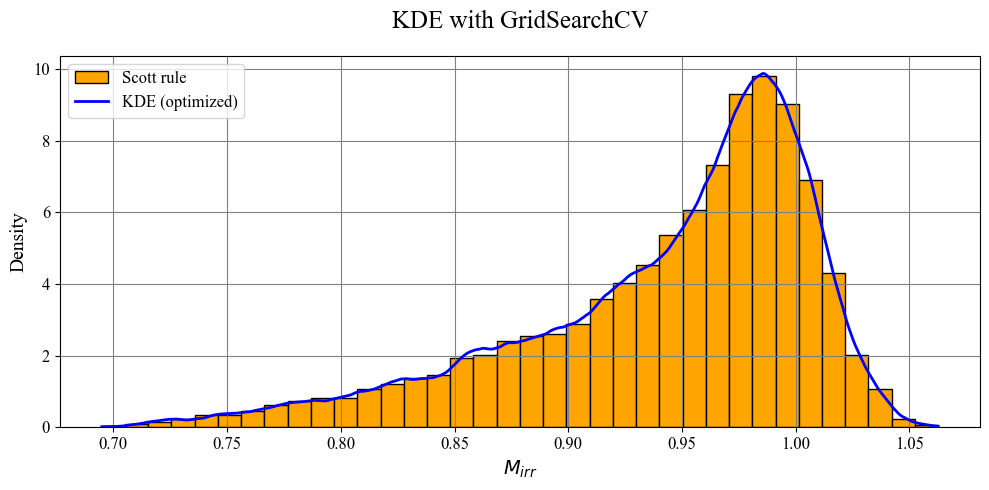

In [80]:
# KDE evaluation
kde = grid.best_estimator_
x_plot = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
log_dens = kde.score_samples(x_plot)

# Plot
plt.hist(data.ravel(), bins='scott', density=True, color='orange', edgecolor='black', label='Scott rule')
plt.plot(x_plot.ravel(), np.exp(log_dens), color='blue', label='KDE (optimized)')
plt.title('KDE with GridSearchCV')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.legend()

4. **Compute the KS distance between $\frac{M_{irr}}{\mu}$ and $f(\chi)$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.**
5. **Compute the KS distance between $M_{irr}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.**

In [81]:
sigmas = np.power(10, np.linspace(-3, 1, 50))

In [82]:
def compute_cdf(x, plot=False):

   x      = np.sort(np.array(x))  
   ecdf_y = np.arange(1, len(data) + 1) / len(data)

   if plot:
      plt.plot(ecdf_y, marker='.', linestyle='none')
      plt.xlabel(r'$M_{irr}$')
      plt.ylabel('ECDF')
      plt.title('Empirical CDF')
      plt.grid(True)
      plt.show()

   return ecdf_y

In [83]:
from scipy.stats import ks_2samp

In [84]:
Dchi, DM_ = [], []
for s in sigmas:
    M_ = np.random.normal(mu,s,N)
    D = Mirr(M_,chi)
    Dchi.append(ks_2samp(D, f(chi), method='exact'))
    DM_.append(ks_2samp(D, M_, method='exact'))

In [85]:
Dchi = np.array(Dchi)
DM_  = np.array(DM_)

Text(0.5, 0.98, 'Kolmogorov-Smirnoff Test')

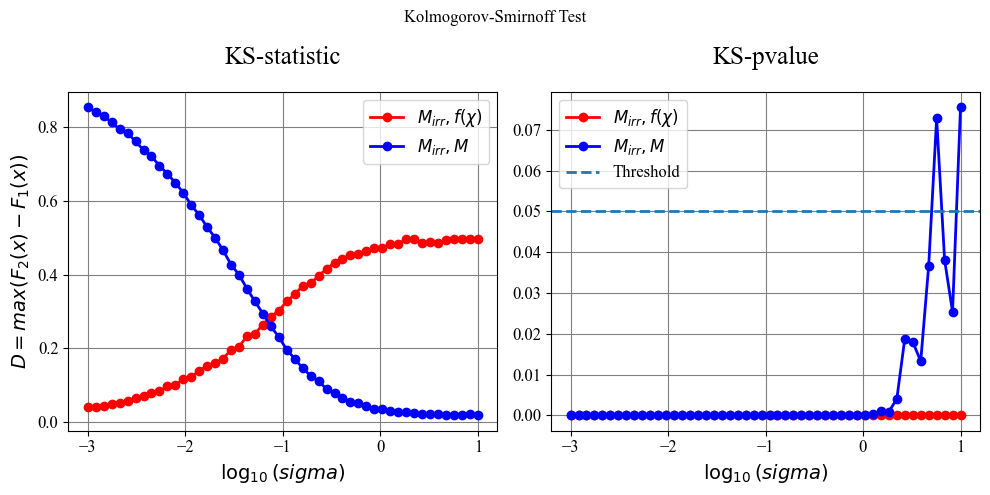

In [86]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(np.log10(sigmas), Dchi.T[0], marker='o', color='red', lw=2, label=r'$M_{irr}, f(\chi)$')
axs[0].plot(np.log10(sigmas), DM_.T[0], marker='o', color='blue', lw=2, label=r'$M_{irr}, M$')
axs[0].set_xlabel(r'$\log_{10}(sigma)$')
axs[0].set_ylabel(r'$D = max(F_2(x) - F_1(x))$')
axs[0].set_title('KS-statistic')
axs[0].legend()

axs[1].plot(np.log10(sigmas), Dchi.T[1], marker='o', color='red', lw=2, label=r'$M_{irr}, f(\chi)$')
axs[1].plot(np.log10(sigmas), DM_.T[1], marker='o', color='blue', lw=2, label=r'$M_{irr}, M$')
axs[1].axhline(0.05,0, 1, linestyle='--', lw=2, label='Threshold')
axs[1].set_xlabel(r'$\log_{10}(sigma)$')
axs[1].set_title('KS-pvalue')
axs[1].legend()
plt.suptitle('Kolmogorov-Smirnoff Test')

Seems like for very small sigma values the distribution of the irreducible mass tends to be more similar to that of $M$; as $\sigma \approx 1$ the distribution of the irreducible mass values tends rapidly to the distribution of $M$, which is a normal distribution $\mathcal{N}(\mu, \sigma)$.\
Looking at the p-value we can safely say that for $KS(M_{irr}, M)$:
 - Untill $\sigma \approx \sqrt{10}$ p-value $< 0.05$ thus I can reject the null hypothesis and conclude that the samples are drawn from significantly different distribution $\to$ $M_{irr}$ distribution is very different from a normal.
 - As $\sigma$ surpasses that point, I do not posses enough evidence to say that I can reject the null hypothesis (distribution of $M_{irr}$ is very similar to a gaussian)

 I'd like to confirm this also visually.

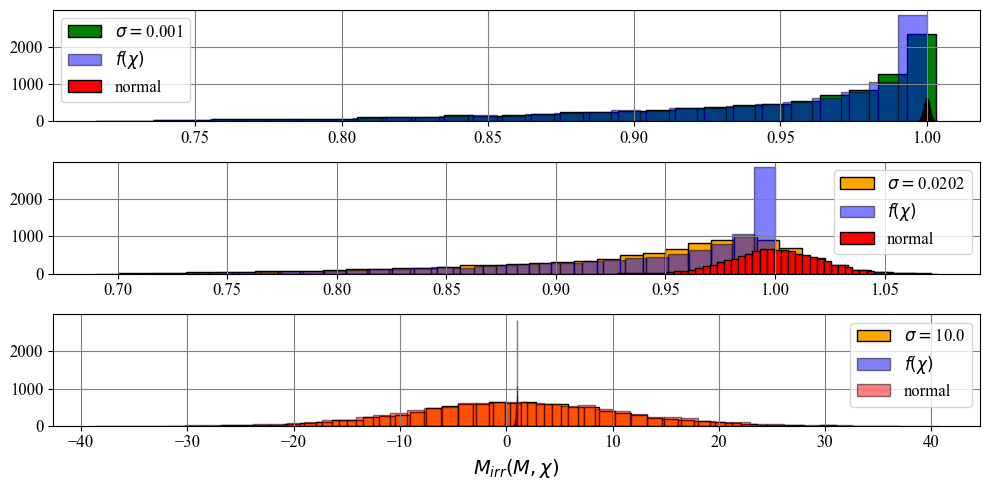

In [87]:
fig, axs = plt.subplots(3, 1)

axs[0].hist(Mirr(np.random.normal(mu,sigmas[0],N),chi), bins='scott', histtype='barstacked', color='green', 
            edgecolor='black', label=r'$\sigma = $'+f'{sigmas[0]:.3}');
axs[0].hist(f(chi), bins='scott', histtype='barstacked', color='blue',
            edgecolor='black', label=r'$f(\chi)$', alpha=0.5);
axs[0].hist(np.random.normal(mu,sigmas[0],N), bins='scott', histtype='barstacked', color='red', 
            edgecolor='black', label=r'normal', alpha=1);

axs[1].hist(Mirr(np.random.normal(mu,sigmas[int(len(sigmas)/3)],N),chi), bins='scott', histtype='barstacked', color='orange', 
            edgecolor='black', label=r'$\sigma = $'+f'{sigmas[int(len(sigmas)/3)]:.3}');
axs[1].hist(f(chi), bins='scott', histtype='barstacked', color='blue',
            edgecolor='black', label=r'$f(\chi)$', alpha=0.5);
axs[1].hist(np.random.normal(mu,sigmas[int(len(sigmas)/3)],N), bins='scott', histtype='barstacked', color='red', 
            edgecolor='black', label=r'normal', alpha=1);


axs[2].hist(Mirr(np.random.normal(mu,sigmas[-1],N),chi), bins='scott', histtype='barstacked', color='orange', 
            edgecolor='black', label=r'$\sigma = $'+f'{sigmas[-1]:.3}');
axs[2].hist(f(chi), bins='scott', histtype='barstacked', color='blue',
            edgecolor='black', label=r'$f(\chi)$', alpha=0.5);
axs[2].hist(np.random.normal(mu,sigmas[-1],N), bins='scott', histtype='barstacked', color='red', 
            edgecolor='black', label=r'normal', alpha=0.5);


axs[2].set_xlabel(r'$M_{irr}(M,\chi)$');
axs[0].legend();
axs[1].legend();
axs[2].legend();